# Accessing BurnPro3D Data from Zarr Files


BurnPro3D is a web-platform for planning, designing, modeling, and evaluating prescribed burn plans under different environmental conditions. This platform uses [QUIC-fire](https://research.fs.usda.gov/treesearch/59686), a 3-dimensional coupled fire/atmosphere model, and [FastFuels](https://research.fs.usda.gov/firelab/projects/fastfuels), a 3-dimensional vegetation model,  to model the burns. Our aim is to offer diverse users the ability to understand the risks and tradeoffs associated with changes in environmental conditions and the prescribed burn plans through detailed models of vegetation and fire behavior. Register for BurnPro3D [here](https://burnpro3d.sdsc.edu/register.html).

This notebook demonstrates how to access BurnPro3D output data stored in Zarr format, save 2D Zarr rasters as georeferenced tif files, and visualize the 3D fuel density.

1. Accessing the Zarr file from a given URL.
2. View metadata of the BurnPro3D run.
3. Explore different groups available in the Zarr directory, such as `spatial_ref`, `topography`, and `fuels-dens`.
4. Save the processed arrays as a georeferenced raster (.tif file) using Rasterio.
5. Look at the fuel density arrays in 3D.

In [1]:
# import packages
import zarr
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.transform import from_origin
import pandas as pd

In [2]:
# read in the BurnPro3D export csv file
exportfile = pd.read_csv('./BurnPro3D_Yosemite_Example.csv', skiprows = 1)

In [3]:
# view the file
exportfile.head()

,id,name,fdfm,live_fm,wind_speed_mph,wind_direction,surface,midstory,canopy,outside_surface_growth_rate,outside_canopy_consumption_rate,time_to_traverse_buffer,run_max_mem_rss_MB,elapsed_model_s,fuels_dens_surface_final_plot,run_zarr,fuel_zarr
0,bcbb40c0-2875-4753-b77a-a7d382b8045f,Yosemite valentine's day burn,0.08,0.9,3,30,0.906997,0.791413,0.229937,-1,-1,-1,7116,53844,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,http://wifire-data.sdsc.edu/data/burnpro3d/d/4...
1,d27d6ab2-b9ad-42d5-95b8-d191d88dc98a,Yosemite valentine's day burn,0.08,0.9,5,45,0.943703,0.831646,0.276063,-1,-1,-1,7116,26488,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,http://wifire-data.sdsc.edu/data/burnpro3d/d/4...
2,cbfc1b23-239f-4c29-8dc8-77f8430a116c,Yosemite valentine's day burn,0.10,0.9,3,30,0.882083,0.774388,0.225903,-1,-1,-1,7116,33863,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,http://wifire-data.sdsc.edu/data/burnpro3d/d/4...
3,b864daaf-321b-4fdf-bd20-b09eebfc57a1,Yosemite valentine's day burn,0.12,0.9,5,60,0.906139,0.795659,0.264101,-1,-1,-1,7116,33903,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,http://wifire-data.sdsc.edu/data/burnpro3d/d/4...
4,9674ad06-cf9b-41e9-b338-6be7ccd1bc3b,Yosemite valentine's day burn,0.12,0.9,3,30,0.834782,0.726334,0.221550,-1,-1,-1,7116,34119,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,https://wifire-data.sdsc.edu/data/burnpro3d/d/...,http://wifire-data.sdsc.edu/data/burnpro3d/d/4...


The `fuel_zarr` column is the column of urls of zarr files that detail the results. For this example, we will choose the run where 
the fine dead fuel moisture was set to 12% the live fuel moisture was set to 90%, the wind speed was set to 3 MPH at 30 degrees. The results showed 83% surface consumption, 73% midstory consumption, and 22% canopy

In [4]:
# the fuel_zarr column is the column of urls of zarr files that detail the results.
url = exportfile.run_zarr[4]

z = zarr.open(url)

### View the Metadata of the BurnPro3D Run

In [5]:
dict(z.attrs)

{'burn_area': {'coordinates': [[[-119.639117347, 37.536480244],
    [-119.638938785, 37.536581103],
    [-119.63878706, 37.536640813],
    [-119.638187038, 37.536613676],
    [-119.63807685, 37.53666795],
    [-119.637869681, 37.536809997],
    [-119.637600576, 37.536910624],
    [-119.63715247, 37.536909372],
    [-119.6370461, 37.536891474],
    [-119.636545664, 37.536810291],
    [-119.636249309, 37.536810152],
    [-119.635938692, 37.536886923],
    [-119.635635316, 37.537008586],
    [-119.635532539, 37.537042418],
    [-119.635159195, 37.537165642],
    [-119.634759512, 37.537203849],
    [-119.634042291, 37.537192823],
    [-119.632852741, 37.537075187],
    [-119.632752695, 37.537066154],
    [-119.632689839, 37.53707882],
    [-119.632063165, 37.537198673],
    [-119.631373393, 37.537324435],
    [-119.630856426, 37.537356232],
    [-119.6303736, 37.537202543],
    [-119.630028897, 37.537165169],
    [-119.629711539, 37.53718125],
    [-119.629545963, 37.53716917],
    [-119.6

### Explore Zarr Data
If you go to the link, you can see the groups available in the zarr directory: `fuels-dens`, `spatial_ref`, and `topography`.

Let's explore each.

`spatial_ref` - this is the spatial reference for the files, unlike the other groups, the data here is not stored in an array format. We can access the data using `.attrs`

In [6]:
dict(z['spatial_ref'].attrs)

{'GeoTransform': '-2048070.0 2.0 0.0 1866124.0 0.0 2.0',
 '_ARRAY_DIMENSIONS': [],
 'crs_wkt': 'PROJCS["NAD83 / Conus Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5070"]]',
 'false_easting': 0.0,
 'false_northing': 0.0,
 'geographic_crs_name': 'NAD83',
 'grid_mapping_name': 'albers_conical_equal_area',
 'horizontal_datum_name': 'North American Datum 1983',
 'inverse_flattening': 298.257222101,
 'latitude_of_pro

`topography` - this is the topography array.

In [7]:
#see that it is stored as an array, and see the dimensions of the array, and data type
z['topography']

<zarr.core.Array '/topography' (416, 669) float16>

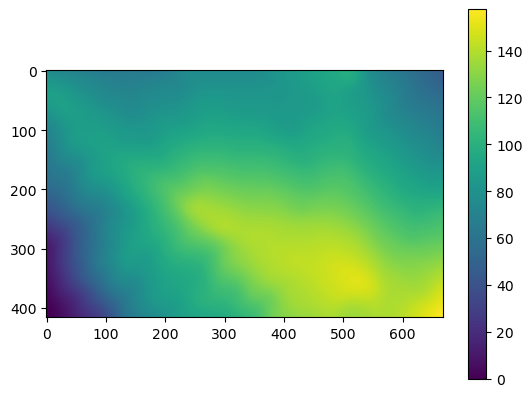

In [8]:
#let's plot the topography
# note that you will need to flip the arrays to be the north side up when you plot it

topo = z['topography'][...]

plt.imshow(np.flipud(topo))
plt.colorbar()

`fuels-dens` - this shows where fine fuel consumption occurred during the burn at different time steps. Check the metadata about the run to see the timestep interval (in seconds)

In [9]:
# look at the attributes, and see that the array is ordered by time, height, y, and x
dict(z['fuels-dens'].attrs)

{'_ARRAY_DIMENSIONS': ['t0', 'z0', 'y0', 'x0'],
 'cache_max': 8.0,
 'cache_min': 0.0,
 'description': 'fuel density',
 'grid_mapping': 'spatial_ref',
 'units': 'kg/m^3'}

In [10]:
# look at the array information
z['fuels-dens']

<zarr.core.Array '/fuels-dens' (119, 68, 416, 669) float16>

In [11]:
# Prepare initial and final fuel density arrays
# note that you will need to flip the arrays to be the north side up when you plot it

initial_density = np.float32(z['fuels-dens'][0,:,:,:])

final_layer_size = z['fuels-dens'].shape[0] - 1
final_density = np.float32(z['fuels-dens'][final_layer_size,:,:,:])


initial_density_flip = initial_density[:,::-1,:]
final_density_flip = final_density[:,::-1,:]

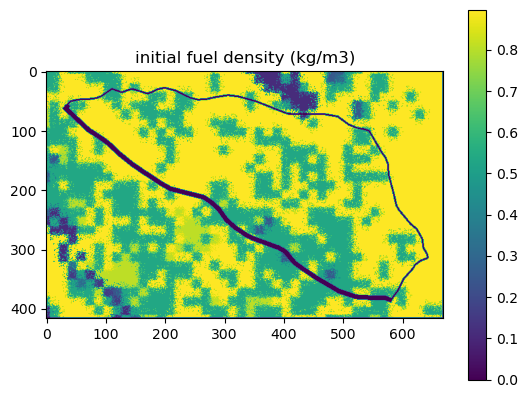

In [12]:
#plot the initial fuel density at the surface, fuel density data is from FastFuels

plt.imshow(initial_density_flip[0,:,:])
plt.title('initial fuel density (kg/m3)')
plt.colorbar()

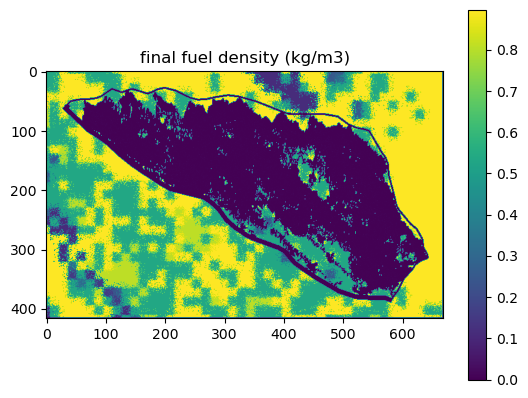

In [13]:
#plot the final fuel density at the surface, you can see where the surface was burned

plt.imshow(final_density_flip[0,:,:])
plt.title('final fuel density (kg/m3)')
plt.colorbar()

### Save the arrays as a .tif file

In [14]:
# get the correct transform and spatial reference from the attributes

original_transform = str.split(dict(z['spatial_ref'].attrs)['GeoTransform'], ' ')
nt, nz, ny, nx = z['fuels-dens'].shape
x_res, y_res, z_res = dict(z.attrs)['resolution'] #the resolution in m

#need to adjust the original transform to change the origin from min y to max y through calculations
transform = from_origin(float(original_transform[0]), 
                        float(original_transform[3]) + ny * y_res, 
                        float(original_transform[1]), 
                        float(original_transform[5]))
crs = rasterio.crs.CRS.from_string(dict(z['spatial_ref'].attrs)['crs_wkt'])

print('transform is ')
transform

transform is 


Affine(2.0, 0.0, -2048070.0,
       0.0, -2.0, 1866956.0)

In [15]:
# use rasterio to save one time step (2D image) as .tif file
# to save multiple time steps, change the count to the number of timesteps you want and loop through

rastername = 'raster.tif'
im = final_density_flip[0,:,:] #2d image you want to save as raster

new_dataset = rasterio.open(rastername, 'w', 
                            driver='GTiff',
                            height = ny, 
                            width = nx,
                            count=1, 
                            dtype=str(im.dtype),
                            crs=crs,
                            transform=transform)

new_dataset.write(im, 1)
new_dataset.close()

### Look at the arrays in 3D
Let's look at the initial fuel density that we have already saved in 3D

In [16]:
# remind ourselves about the shape of the initial fuel density array, the array is ordered: z, y, x
print(initial_density_flip.shape)

(68, 416, 669)


In [17]:
# change the shape from z,y,x to x,y,z
density = np.moveaxis(initial_density_flip, 0, 2)

# subset the array - not necessary, but just for quick vizualization purposes
density = density[0:100, 0:100, :]


In [18]:
# normalize density to be between 0 and 1
valmin = np.nanmin(density)
valmax = np.nanmax(density)
normalized_values = (density - valmin) / (valmax - valmin)

# don't show densities less that 0.05 kg/m3
normalized_values[normalized_values < 0.05] = np.nan

In [19]:
# prepare some coordinates for the indices
xi, yi, zi = np.indices((density.shape[0] + 1, density.shape[1] + 1 ,density.shape[2] + 1))
coloration = plt.cm.viridis(normalized_values) 

[Text(0.5, 0, 'x'), Text(0.5, 0.5, 'y'), Text(0.5, 0, 'z')]

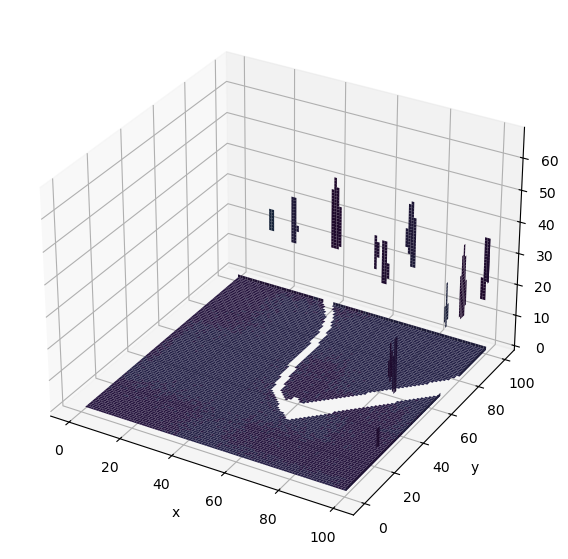

In [20]:
# Create plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.voxels(xi, 
          yi, 
          zi, 
          normalized_values,
          facecolors=coloration,
          # edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='x', ylabel='y', zlabel='z')
